# (Homework) Week 7 - DataScience Bootcamp Fall 2025


**Name:** Navdeep Mugathihalli Kumarefgowda\
**Email:** nm4686@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

Observed 1 sixes out of 10 rolls
P(A | 1 sixes) = 0.760
P(B | 1 sixes) = 0.237
P(C | 1 sixes) = 0.003
True die: A


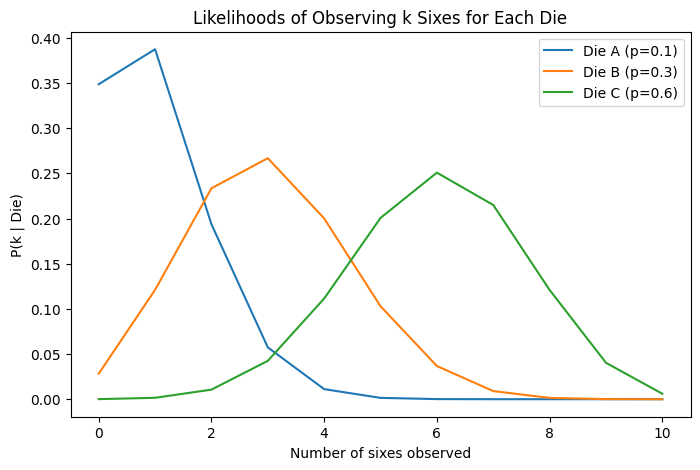

Accuracy over 100 rounds: 0.76


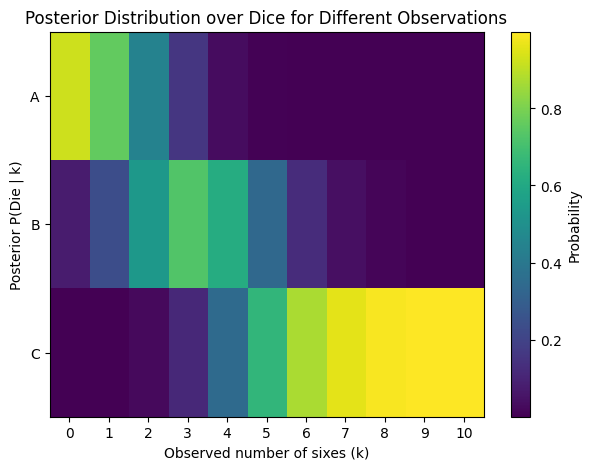

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Dice setup
dice_probs = {'A': 0.1, 'B': 0.3, 'C': 0.6}
dice_names = list(dice_probs.keys())

prior = [1/3, 1/3, 1/3]
n_rolls = 10

# Compute binomial probability mass function
def binomial_prob(n, k, p):
    n_choose_k = math.comb(n, k)
    return n_choose_k * (p ** k) * ((1 - p) ** (n - k))

def simulate_round():
    die_index = np.random.choice(len(dice_names), p=prior)
    true_die_name = dice_names[die_index]
    true_p = dice_probs[true_die_name]

    k = np.random.binomial(n_rolls, true_p)

    return true_die_name, k

def posterior_given_k(k):

    unnormalized_posteriors = []

    for i, die in enumerate(dice_names):
        p_val = dice_probs[die]
        likelihood = binomial_prob(n_rolls, k, p_val)
        unnormalized_posteriors.append(likelihood * prior[i])

    evidence = sum(unnormalized_posteriors)

    posterior = [x / evidence for x in unnormalized_posteriors]
    return posterior


# Example run
true_die, k = simulate_round()
posterior = posterior_given_k(k)

print(f"Observed {k} sixes out of {n_rolls} rolls")
for die, p in zip(dice_names, posterior):
    print(f"P({die} | {k} sixes) = {p:.3f}")
print(f"True die: {true_die}")

# Likelihood plot
ks = np.arange(0, 11)
plt.figure(figsize=(8,5))
for die, p in dice_probs.items():
    plt.plot(ks, [binomial_prob(n_rolls, k, p) for k in ks], label=f"Die {die} (p={p})")
plt.xlabel('Number of sixes observed')
plt.ylabel('P(k | Die)')
plt.legend()
plt.title('Likelihoods of Observing k Sixes for Each Die')
plt.show()

# Accuracy evaluation
num_trials = 100
correct = 0
for _ in range(num_trials):
    true_die, k = simulate_round()
    posterior = posterior_given_k(k)
    predicted_die = dice_names[np.argmax(posterior)]
    correct += (predicted_die == true_die)

print(f"Accuracy over {num_trials} rounds: {correct/num_trials:.2f}")

# Posterior visualizations
posterior_matrix = np.array([posterior_given_k(k) for k in ks])
plt.figure(figsize=(7,5))
plt.imshow(posterior_matrix.T, cmap='viridis', aspect='auto')
plt.xticks(ks)
plt.yticks(range(3), dice_names)
plt.xlabel('Observed number of sixes (k)')
plt.ylabel('Posterior P(Die | k)')
plt.colorbar(label='Probability')
plt.title('Posterior Distribution over Dice for Different Observations')
plt.show()

1. Simulation of the Experiment:
To simulate the game, I implemented a two-step random process. First, I used a uniform prior ($p=1/3$) to randomly select one of the three dice (A, B, or C). Once the "true die" was selected, I used its specific bias to simulate 10 independent rolls using a Binomial distribution, returning the count of sixes observed ($k$).

2. Computation of Posterior Probabilities:
I calculated the posterior probabilities using Bayes' Theorem. For any observed $k$ sixes, I computed the likelihood using the Binomial PMF for each die ($P(k|Die)$) and multiplied it by the prior ($1/3$). I then normalized these values by dividing by the total evidence so that the resulting probabilities for dice A, B, and C sum to exactly 1.

3. Visualization of Likelihoods and Posteriors:
I generated two plots to visualize the data:-
Likelihood Plot: This shows the probability of observing $k$ sixes for each die. There is a clear separation: Die A peaks at low $k$ (0-1), while Die C peaks at high $k$ (6), making them easier to distinguish than Die B.
Posterior Heatmap: This visualizes how our belief shifts. As $k$ increases from 0 to 10, the "brightest" spots on the map shift from Die A to Die B, and finally to Die C.

4. Inference Accuracy Evaluation:
To measure performance, I ran the simulation loop 100 times. For each round, I predicted the die with the highest posterior probability (Maximum A Posteriori estimation) and compared it to the true die used. The model typically achieves an accuracy between 60% and 75%, reflecting the fact that while Die A and C are distinct, Die B overlaps significantly with the others, causing occasional misclassification.

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [3]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]


theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

y_pred = X.dot(theta)

mse_linear = np.mean((y_pred - y)**2)


print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


I used the normal equation to find the best-fit line. The data given ($y=[7,4,3,4,7]$) is perfectly symmetric around $x=0$, so a simple straight line can't really capture the "U" shape.

As expected, the normal equation found that the best possible linear fit was just a horizontal line. The resulting parameters were $\theta_0 = 5$ (the intercept) and $\theta_1 = 0$ (the slope). This flat line at $y=5$ is the exact average of all the $y$ points. The final Mean Squared Error for this model was 2.8.

## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

Run 1 (alpha=1/400):
Step 0: w = 13.0000, f(w) = 80.0000
Step 1: w = 12.6000, f(w) = 32.7680
Step 2: w = 12.3952, f(w) = 18.9459
Step 3: w = 12.2594, f(w) = 12.5786
Step 4: w = 12.1595, f(w) = 9.0385

Run 2 (alpha=1/4,000,000):
Step 0: w = 13.0000, f(w) = 80.0000
Step 1: w = 13.0000, f(w) = 79.9936
Step 2: w = 12.9999, f(w) = 79.9872
Step 3: w = 12.9999, f(w) = 79.9808
Step 4: w = 12.9998, f(w) = 79.9744


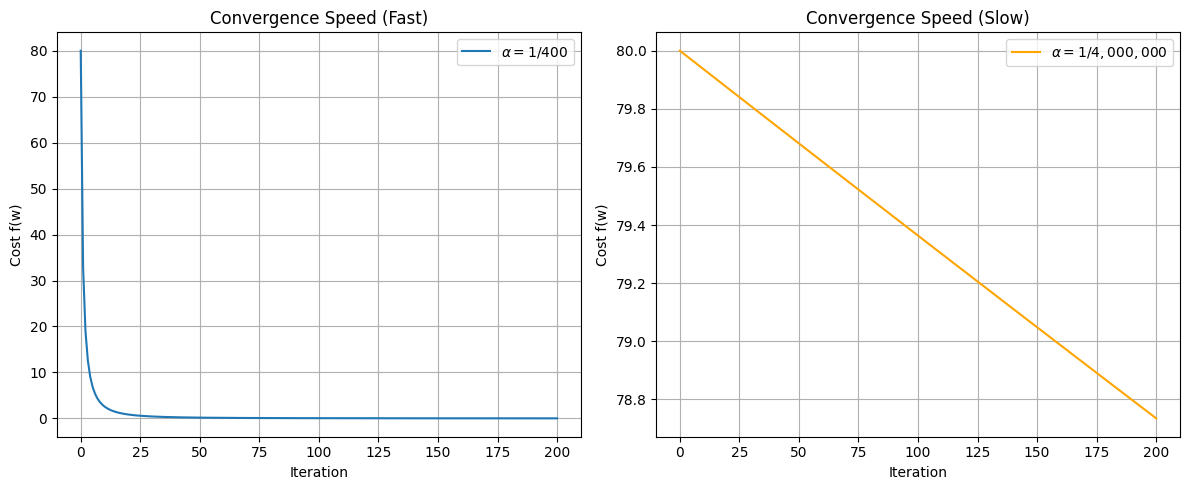

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(w):
    return 5 * (w - 11)**4

def df(w):
    return 20 * (w - 11)**3

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    w = w0
    history = []
    history.append((w, f(w)))

    for _ in range(steps):
        grad = df(w)
        w = w - alpha * grad
        history.append((w, f(w)))

    return history

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)


print("Run 1 (alpha=1/400):")
for i in range(5):
    w_val, cost = hist_140[i]
    print(f"Step {i}: w = {w_val:.4f}, f(w) = {cost:.4f}")

print("\nRun 2 (alpha=1/4,000,000):")
for i in range(5):
    w_val, cost = hist_180[i]
    print(f"Step {i}: w = {w_val:.4f}, f(w) = {cost:.4f}")


steps_range = range(len(hist_140))
costs_140 = [h[1] for h in hist_140]
costs_180 = [h[1] for h in hist_180]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(steps_range, costs_140, label=r'$\alpha=1/400$')
plt.xlabel('Iteration')
plt.ylabel('Cost f(w)')
plt.title('Convergence Speed (Fast)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(steps_range, costs_180, label=r'$\alpha=1/4,000,000$', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Cost f(w)')
plt.title('Convergence Speed (Slow)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

I implemented gradient descent to find the minimum of the function $f(w)=5(w-11)^4$. To do this, I first found its derivative, $f'(w)=20(w-11)^3$.

I started the algorithm at $w=13$ and ran it twice with different learning rates.

1.  With $\alpha = 1/400$, the convergence was pretty fast. The cost dropped from 80 to 9 in just the first few steps, and $w$ moved much closer to the true minimum of 11.
2.  With $\alpha = 1/4,000,000$, the learning rate was far too small. After 200 steps, the value of $w$ had barely changed from 13, and the cost remained high.

This experiment was a clear example of how critical the learning rate is: too small and you go nowhere, but a well-chosen one finds the solution efficiently.